In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

In [3]:
agrupados = pd.read_csv(r'D:\Blue EdTech\bootcamp\dados\full_grouped.csv')

In [4]:
agrupados

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


Observar os países sugeridos:
- Espanha
- Equador
- Chile
- México
- Argentina

In [5]:
paises = ['Mexico', 'Argentina', 'Ecuador', 'Chile', 'Spain']
query_paises = agrupados[agrupados['Country/Region'].isin(paises)]

In [6]:
query_paises

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
35,2020-01-22,Chile,0,0,0,0,0,0,0,Americas
51,2020-01-22,Ecuador,0,0,0,0,0,0,0,Americas
111,2020-01-22,Mexico,0,0,0,0,0,0,0,Americas
157,2020-01-22,Spain,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34975,2020-07-27,Argentina,167416,3059,72575,91782,4890,120,2057,Americas
35004,2020-07-27,Chile,347923,9187,319954,18782,2133,75,1859,Americas
35020,2020-07-27,Ecuador,81161,5532,34896,40733,467,17,0,Americas
35080,2020-07-27,Mexico,395489,44022,303810,47657,4973,342,8588,Americas


In [7]:
query_paises.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,72781.973404,5881.014894,45723.015957,21177.942553,1359.498936,95.991489,937.884043
std,101824.646759,10203.760263,75899.586339,26475.200141,2058.306640,213.575719,2310.326259
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1918.000000,-16298.000000
25%,18.500000,0.000000,1.000000,17.750000,0.000000,0.000000,0.000000
50%,15214.500000,470.500000,3433.000000,8144.500000,374.000000,9.000000,8.500000
75%,118839.750000,5217.750000,53901.750000,30695.250000,1985.750000,69.750000,1018.500000
max,395489.000000,44022.000000,319954.000000,101617.000000,13990.000000,1179.000000,41227.000000


In [8]:
print(
    f"Médias dos 5 países\n\n",
    f"Confirmados - {query_paises.Confirmed.mean():,.0f} mil\n".replace(',','.'),
    f"Mortos      - {query_paises.Deaths.mean():,.0f} mil\n".replace(',','.'),
    f"Recuperados - {query_paises.Recovered.mean():,.0f} mil\n".replace(',','.'),
    f"Ativos      - {query_paises.Active.mean():,.0f} mil\n".replace(',','.')
    )


Médias dos 5 países

 Confirmados - 72.782 mil
 Mortos      - 5.881 mil
 Recuperados - 45.723 mil
 Ativos      - 21.178 mil



<function matplotlib.pyplot.show(close=None, block=None)>

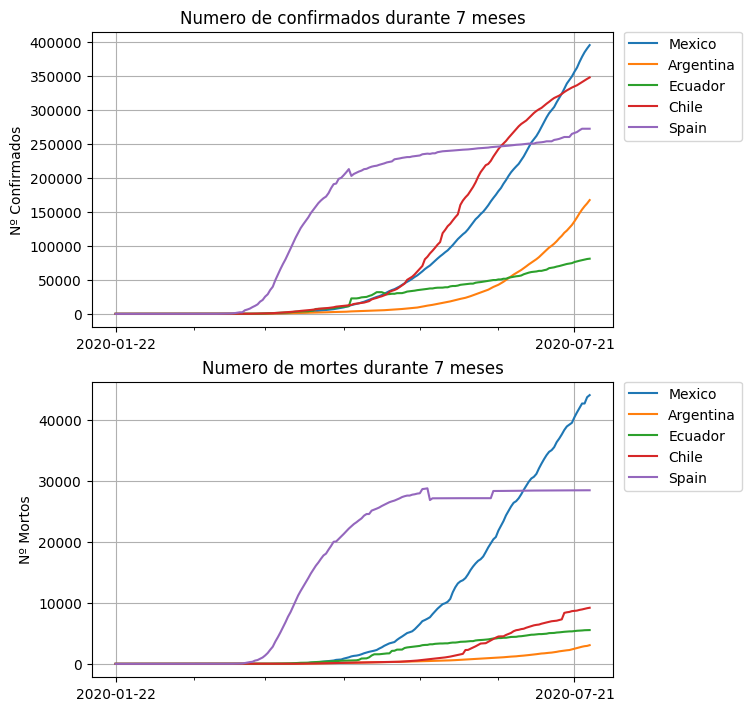

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(7.4, 7), constrained_layout=True)

# Ajustando data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

# Grafico de linhas - Confirmados
ax = axs[0]
ax.set_title(r'Numero de confirmados durante 7 meses')
ax.set_ylabel(r'Nº Confirmados')
for i in range(len(paises)):
    ax.plot('Date', 'Confirmed', 
            data=query_paises[query_paises['Country/Region'] == paises[i]],
            label= paises[i] )
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
# Grafico de linhas - Mortes
ax = axs[1]
ax.set_title(r'Numero de mortes durante 7 meses')
ax.set_ylabel(r'Nº Mortos')

for i in range(len(paises)):
    ax.plot('Date', 'Deaths', 
            data=query_paises[query_paises['Country/Region'] == paises[i]],
            label= paises[i] )
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show

In [11]:
query_paises_cem = query_paises.copy()

In [46]:
query_paises['Deaths/100 Cases'] = query_paises['Deaths']/(query_paises['Confirmed']/100)
query_paises['Recovered/100 Confirmed'] = query_paises['Recovered']/(query_paises['Confirmed']/100)

C:\Users\brodr\AppData\Local\Temp\ipykernel_9324\1275135094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_paises['Deaths/100 Cases'] = query_paises['Deaths']/(query_paises['Confirmed']/100)
C:\Users\brodr\AppData\Local\Temp\ipykernel_9324\1275135094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_paises['Recovered/100 Confirmed'] = query_paises['Recovered']/(query_paises['Confirmed']/100)


In [47]:
query_paises.head(1)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Deaths/100 Cases,Recovered/100 Confirmed
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,NaN,NaN


In [14]:
mexico_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Mexico']
argentina_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Argentina']
ecuador_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Ecuador']  
chile_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Chile']
spain_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Spain']

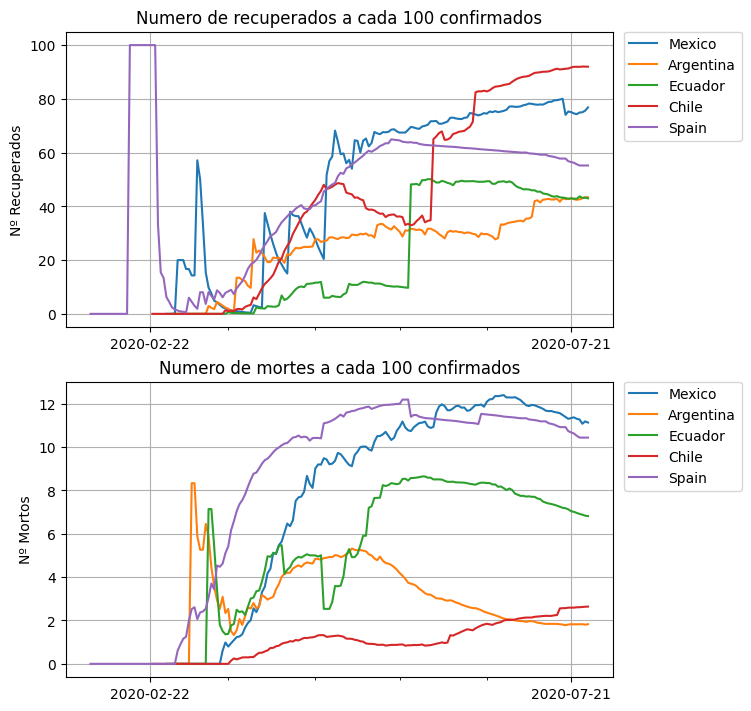

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(7.4, 7), constrained_layout=True)

# Ajustando data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(2, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

# Grafico de linhas - Confirmados
ax = axs[0]
ax.set_title(r'Numero de recuperados a cada 100 confirmados')
ax.set_ylabel(r'Nº Recuperados')
for i in range(len(paises)):
    ax.plot('Date', 'Recovered/100 Confirmed', 
            data=query_paises[query_paises['Country/Region'] == paises[i]],
            label= paises[i] )
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Grafico de linhas - Mortes
ax = axs[1]
ax.set_title(r'Numero de mortes a cada 100 confirmados')
ax.set_ylabel(r'Nº Mortos')
for i in range(len(paises)):
    ax.plot('Date', 'Deaths/100 Cases', 
            data=query_paises[query_paises['Country/Region'] == paises[i]],
            label= paises[i] )
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

### Observando ADF

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

In [18]:
query_paises['Date'] = pd.to_datetime(query_paises_cem.Date, format="%Y-%m-%d")

In [19]:
query_paises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 6 to 35126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     940 non-null    datetime64[ns]
 1   Country/Region           940 non-null    object        
 2   Confirmed                940 non-null    int64         
 3   Deaths                   940 non-null    int64         
 4   Recovered                940 non-null    int64         
 5   Active                   940 non-null    int64         
 6   New cases                940 non-null    int64         
 7   New deaths               940 non-null    int64         
 8   New recovered            940 non-null    int64         
 9   WHO Region               940 non-null    object        
 10  Deaths/100 Cases         781 non-null    float64       
 11  Recovered/100 Confirmed  781 non-null    float64       
dtypes: datetime64[ns](1), float64(2), 

In [20]:
from statsmodels.tsa.stattools import adfuller # importar o teste ADF

sns.set_style()

In [21]:
# observando numero de confirmados da Argentina utilizando o metodo adFuller
df = argentina_2.copy()
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date', inplace=True)
# extrair apenas os valores
X = df.Confirmed.values

# aplicar ADF e imprimir o resultado
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: 0.2191
Valor-p: 0.9733
Valores Críticos:
	1%: -3.4690
	5%: -2.8785
	10%: -2.5758


C:\Users\brodr\AppData\Local\Temp\ipykernel_9324\3279739102.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Country/Region', 'WHO Region'], dtype='object')
  ma = df.rolling(12).mean()


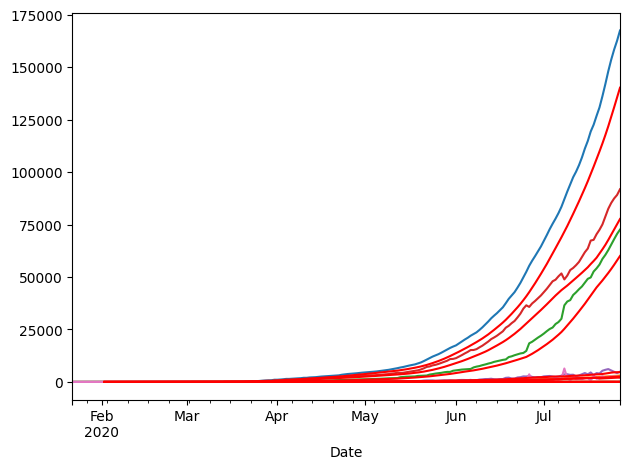

In [22]:
ma = df.rolling(12).mean()

fig, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

In [23]:
df.drop(['Country/Region', 'WHO Region'], axis=1, inplace=True)

C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


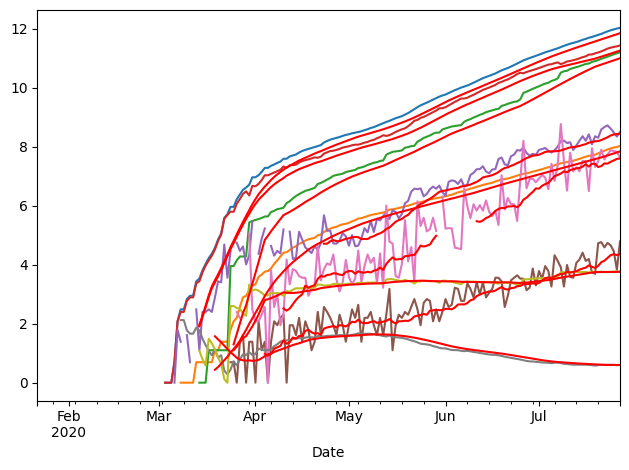

In [24]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()